Deepika Mulchandani  

deepikak@vt.edu  

+1(540)4497621

## GREEN TAXIS

In [2]:
import pandas as pd
import numpy as np
import math
from math import sin,cos,atan2,sqrt,ceil,log

##### Question 1  

·         Programmatically download and load into your favorite analytical tool the trip data for September 2015.

·         Report how many rows and columns of data you have loaded.

In [3]:
green=pd.read_csv("/Users/deepikamulchandani/Downloads/green_tripdata_2015-09.csv") #Loading the data into a pandas dataframe
green.head()    # Displaying some of the data to understand the structure, nature and features in the data

,VendorID,lpep_pickup_datetime,Lpep_dropoff_datetime,Store_and_fwd_flag,RateCodeID,Pickup_longitude,Pickup_latitude,Dropoff_longitude,Dropoff_latitude,Passenger_count,...,Fare_amount,Extra,MTA_tax,Tip_amount,Tolls_amount,Ehail_fee,improvement_surcharge,Total_amount,Payment_type,Trip_type
0,2,2015-09-01 00:02:34,2015-09-01 00:02:38,N,5,-73.979485,40.684956,-73.979431,40.685020,1,...,7.8,0.0,0.0,1.95,0.0,NaN,0.0,9.75,1,2.0
1,2,2015-09-01 00:04:20,2015-09-01 00:04:24,N,5,-74.010796,40.912216,-74.010780,40.912212,1,...,45.0,0.0,0.0,0.00,0.0,NaN,0.0,45.00,1,2.0
2,2,2015-09-01 00:01:50,2015-09-01 00:04:24,N,1,-73.921410,40.766708,-73.914413,40.764687,1,...,4.0,0.5,0.5,0.50,0.0,NaN,0.3,5.80,1,1.0
3,2,2015-09-01 00:02:36,2015-09-01 00:06:42,N,1,-73.921387,40.766678,-73.931427,40.771584,1,...,5.0,0.5,0.5,0.00,0.0,NaN,0.3,6.30,2,1.0
4,2,2015-09-01 00:00:14,2015-09-01 00:04:20,N,1,-73.955482,40.714046,-73.944412,40.714729,1,...,5.0,0.5,0.5,0.00,0.0,NaN,0.3,6.30,2,1.0


In [4]:
rows=green.shape[0]
columns=green.shape[1]
print "Number of rows in Green Taxis trip data is : ",rows
print "Number of columns in Green Taxis trip data is : ",columns

Number of rows in Green Taxis trip data is :  1494926
Number of columns in Green Taxis trip data is :  21


##### Question 2  

·         Plot a histogram of the number of the trip distance ("Trip Distance").

·         Report any structure you find and any hypotheses you have about that structure.

For creating histogram, I have calculated the number of bins using the Square Root method. The number of bins in this case is simply the square root of the number of observations. 

Number of bins is: 1223


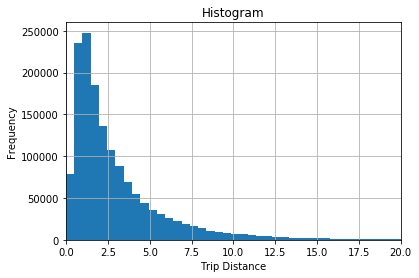

In [5]:
import matplotlib.pyplot as plt
no_of_bins= math.ceil(sqrt(green.shape[0])) #Calculating number of bins
no_of_bins=int(no_of_bins)
print "Number of bins is:" ,no_of_bins
green['Trip_distance'].hist(bins=no_of_bins) #Histogram for number of Trip distance
plt.title("Histogram")
plt.xlabel("Trip Distance")
plt.ylabel("Frequency")
plt.xlim([0,20])
plt.show()

As we can see in the histogram above, as the trip distance increases, the frequency or the number of rides decreases. For the trip distances somewhere between 0.5 to 2.0, the number of rides are as high as 250000. Rides having trip distance as large as 20 are minimal. It can be assumed that most green taxis take short rides most of the times. 

##### Question 3  

        Report mean and median trip distance grouped by hour of day.

        We'd like to get a rough sense of identifying trips that originate or terminate at one of the NYC area airports. Can you provide a count of how many transactions fit this criteria, the average fair, and any other interesting characteristics of these trips.

In [6]:
green["lpep_pickup_datetime"] = pd.to_datetime(green["lpep_pickup_datetime"]) #Converting series to datetime index to access hours using dt.hour
Mean=green.groupby(green['lpep_pickup_datetime'].dt.hour)['Trip_distance'].mean()
Median=green.groupby(green['lpep_pickup_datetime'].dt.hour)['Trip_distance'].median()

In [7]:
print "Mean of the trip distance grouped by hour of day is :"
print Mean
print "Median of the trip distance grouped by hour of day is :"
print Median

Mean of the trip distance grouped by hour of day is :
lpep_pickup_datetime
0     3.115276
1     3.017347
2     3.046176
3     3.212945
4     3.526555
5     4.133474
6     4.055149
7     3.284394
8     3.048450
9     2.999105
10    2.944482
11    2.912015
12    2.903065
13    2.878294
14    2.864304
15    2.857040
16    2.779852
17    2.679114
18    2.653222
19    2.715597
20    2.777052
21    2.999189
22    3.185394
23    3.191538
Name: Trip_distance, dtype: float64
Median of the trip distance grouped by hour of day is :
lpep_pickup_datetime
0     2.20
1     2.12
2     2.14
3     2.20
4     2.36
5     2.90
6     2.84
7     2.17
8     1.98
9     1.96
10    1.92
11    1.88
12    1.89
13    1.84
14    1.83
15    1.81
16    1.80
17    1.78
18    1.80
19    1.85
20    1.90
21    2.03
22    2.20
23    2.22
Name: Trip_distance, dtype: float64


The JFK airport Latitude and Longitude is 40.6441666667 and -73.7822222222. I have calculated the Havershine distance and added it as a column to the data frame. For NYC airport areas, I have picked those havershine distances which are about 300 miles. For these observations, I have provided some useful insights.

In [8]:
def h_dist():

    long1=-73.7822222222
    lat1=40.6441666667
    dist=np.zeros(1494926)
    dist2=np.zeros(1494926)
    i=0
    r = 3956 # Radius of earth in miles
    for index, row in green.iterrows():
        dlon = row['Pickup_longitude']- long1 
        dlat = row['Pickup_latitude'] - lat1 
        dlon2 = row['Dropoff_longitude']- long1 
        dlat2 = row['Dropoff_latitude'] - lat1 
        a = sin(dlat/2)**2 + cos(lat1) * cos(row['Pickup_latitude']) * sin(dlon/2)**2
        a2 = sin(dlat2/2)**2 + cos(lat1) * cos(row['Dropoff_latitude']) * sin(dlon2/2)**2
        c = 2 * atan2( sqrt(a), sqrt(1-a) ) 
        c2 = 2 * atan2( sqrt(a2), sqrt(1-a2) )
        dist[i]=c*r #Havershine distance for pick up locations
        dist2[i]=c2*r #Havershine distance for drop locations
        i=i+1
    return dist,dist2

In [9]:
dist,dist2=h_dist()
green['nearNYCAirport']=dist
green['dropNearNYCAirport']=dist2


In [10]:
nearNYC=green[(green['nearNYCAirport']<=300) | (green['dropNearNYCAirport']<=300)]
print nearNYC.shape[0],"transactions fit the criteria of being near NYC airport"


49203 transactions fit the criteria of being near NYC airport


In [11]:
print "The average fare of these transaction is", nearNYC['Fare_amount'].mean()
print "The average tip of these transaction is", nearNYC['Tip_amount'].mean()
print "The average passenger count in each of these rides is", nearNYC['Passenger_count'].mean().round(0)
print "The most used payment type is",nearNYC['Payment_type'].mode()


The average fare of these transaction is 24.1676290064
The average tip of these transaction is 2.25238217182
The average passenger count in each of these rides is 1.0
The most used payment type is 0    2
dtype: int64


From the data, we know that the payment type 2 is Cash.

##### Question 4  

    Build a derived variable for tip as a percentage of the total fare.

    Build a predictive model for tip as a percentage of the total fare. Use as much of the data as you like (or all of it) 

In [12]:
green['Tip_Percent']=(green['Tip_amount']*100)/green['Total_amount']

For predictive modeling of tip as a percentage of the total fare, I have used the decision tree classification model. 

In [13]:
green['Tip_Percent']=green['Tip_Percent'].round(2)
X = green[['Total_amount']]
y = pd.factorize(green['Tip_Percent'].values)[0].reshape(-1, 1)

from sklearn import tree
from sklearn.model_selection import train_test_split


X_train, X_test, y_train, y_test = train_test_split(
                      X, y, test_size=0.33, random_state=42)

clf = tree.DecisionTreeClassifier()
clf = clf.fit(X_train, y_train)
print("The prediction score is:")
print(clf.score(X_test, y_test))


The prediction score is:
0.875927885415


In [14]:
print("Actual y's are:")
print(y_test)
print("Predicted y's are")
clf.predict(X_test)

Actual y's are:
[[  1]
 [  3]
 [  1]
 ..., 
 [  1]
 [  1]
 [886]]
Predicted y's are


array([1, 3, 1, ..., 1, 1, 1])

##### Question 5
###### Option A: Distributions  

    
     Build a derived variable representing the average speed over the course of a trip.

     Can you perform a test to determine if the average trip speeds are materially the same in all weeks of September? If you decide they are not the same, can you form a hypothesis regarding why they differ?

     Can you build up a hypothesis of average trip speed as a function of time of day?



In [45]:
green['lpep_pickup_datetime'] = pd.to_datetime(green['lpep_pickup_datetime'])
green['Lpep_dropoff_datetime']=pd.to_datetime(green['Lpep_dropoff_datetime'])
green['seconds']=(green['Lpep_dropoff_datetime']-green['lpep_pickup_datetime']).dt.seconds

green['Speed']=(green['Trip_distance']/(green['seconds'])*3600).round(2)
green.fillna(1);


In [44]:
Average_speed=green.groupby(green['lpep_pickup_datetime'].dt.week)['Speed'].mean()
Average_speed



lpep_pickup_datetime
36    12.09
37    11.58
38    11.61
39    12.00
40    11.40
Name: Speed, dtype: float64

The average speed for weeks 36-40(September) are almost the same.

####  References
1. https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.groupby.html
2. https://andrew.hedges.name/experiments/haversine/
3. https://en.wikipedia.org/wiki/Multivariate_adaptive_regression_splines
4. http://contrib.scikit-learn.org/py-earth/content.html
5. https://en.wikipedia.org/wiki/Decision_tree
6. http://scikit-learn.org/stable/modules/tree.html
